# Image Detection dengan Convolutional Neural Network

## Load Dataset


### Import Library

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import shutil, zipfile, os
import gdown
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Ekstrasi File Zip

In [ ]:
file_id = '1JT9gRbvRj-20a847GQTr3t1QuLEkOABW'
url = f'https://drive.google.com/uc?id={file_id}'

output = 'dataset-image.zip'

gdown.download(url, output, quiet=False)

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('/tmp')


Downloading...
From: https://drive.google.com/uc?id=1JT9gRbvRj-20a847GQTr3t1QuLEkOABW
To: /content/dataset-image.zip
100%|██████████| 125M/125M [00:04<00:00, 26.2MB/s]


### Pembuatan Path Data Training

In [ ]:
train_data_dir= os.path.abspath('/tmp/data')

## Preprocessing Data

inisialisasi untuk tinggi dan lebar gambar yang akan diolah

In [ ]:
img_width, img_height = 64, 64

### Pembagian dataset

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4
                    )

validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip= True,
                    shear_range=0.2,
                    fill_mode='nearest',
                    validation_split=0.4
                    )

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size= 32,
    class_mode='binary',
    subset='validation'
)

Found 10657 images belonging to 2 classes.
Found 7103 images belonging to 2 classes.


## Pembuatan Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

## Pelatihan Model

In [ ]:
model.compile(optimizer= tf.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(train_generator,
                 epochs = 32,
                 validation_data=validation_generator,
                 validation_steps=5,
                 verbose=2)

Epoch 1/32
334/334 - 32s - loss: 0.2211 - accuracy: 0.9107 - val_loss: 0.0590 - val_accuracy: 0.9812 - 32s/epoch - 95ms/step
Epoch 2/32
334/334 - 23s - loss: 0.0990 - accuracy: 0.9656 - val_loss: 0.0553 - val_accuracy: 0.9812 - 23s/epoch - 69ms/step
Epoch 3/32
334/334 - 20s - loss: 0.0851 - accuracy: 0.9696 - val_loss: 0.0685 - val_accuracy: 0.9625 - 20s/epoch - 60ms/step
Epoch 4/32
334/334 - 20s - loss: 0.0520 - accuracy: 0.9818 - val_loss: 0.0596 - val_accuracy: 0.9875 - 20s/epoch - 59ms/step
Epoch 5/32
334/334 - 21s - loss: 0.0407 - accuracy: 0.9844 - val_loss: 0.0601 - val_accuracy: 0.9812 - 21s/epoch - 62ms/step
Epoch 6/32
334/334 - 19s - loss: 0.0467 - accuracy: 0.9831 - val_loss: 0.0215 - val_accuracy: 0.9937 - 19s/epoch - 58ms/step
Epoch 7/32
334/334 - 21s - loss: 0.0370 - accuracy: 0.9879 - val_loss: 0.0131 - val_accuracy: 0.9875 - 21s/epoch - 64ms/step
Epoch 8/32
334/334 - 20s - loss: 0.0312 - accuracy: 0.9889 - val_loss: 0.0152 - val_accuracy: 0.9875 - 20s/epoch - 59ms/step


### Hasil Evaluasi Pengujian Model

In [ ]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

222/222 [==============================] - 15s 67ms/step - loss: 0.0824 - accuracy: 0.9810
Test accuracy: 0.98


#### Grafik Hasil Evaluasi Pengujian

Text(0.5, 1.0, 'Training and validation accuracy')

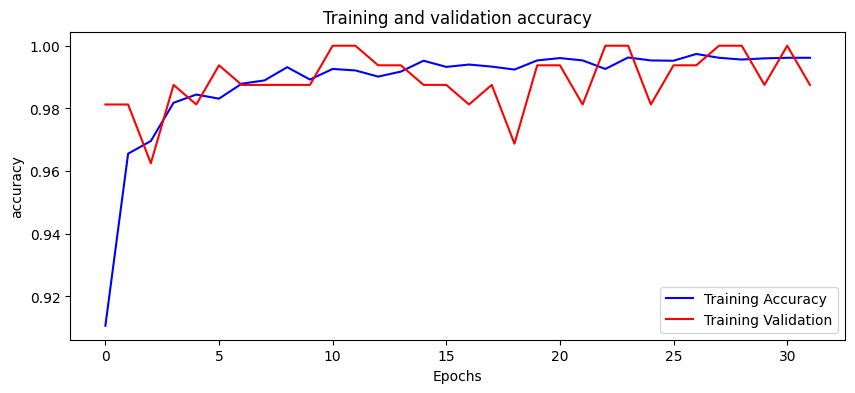

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.figure(figsize=(10,4))
plt.plot(acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Training Validation', color='red')

plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training and validation accuracy')

Text(0.5, 1.0, 'Training and validation loss')

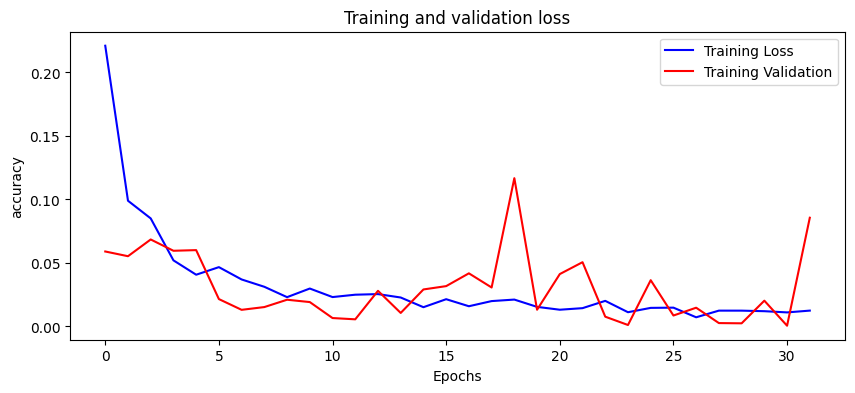

In [ ]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(10,4))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Training Validation', color='red')

plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training and validation loss')

## Save Hasil Model

In [ ]:
model.save('/content/cnn-model-image-detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Final Testing

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

from google.colab import files
from PIL import Image
import io

cnn_model_path = '/content/cnn-model-image-detection.h5'

cnn_model = load_model(cnn_model_path)

test_image_path = files.upload()
image_data = list(test_image_path.values())[0]

img = Image.open(io.BytesIO(image_data))
img = img.convert('RGB')
img = img.resize((img_width, img_height))

test_image = tf.keras.preprocessing.image.img_to_array(img)
test_image /= 255.0  # rescale
test_image = np.expand_dims(test_image, axis=0)

result = cnn_model.predict(test_image)

if result[0][0] > 0.5:
    print("Ini adalah kendaraan. Confidence:", result[0][0])
else:
    print("Ini bukan kendaraan. Confidence:", 1 - result[0][0])


Saving 10-pemandangan-keren-di-indonesia-wajib-dikunjungi-langsung.jpg to 10-pemandangan-keren-di-indonesia-wajib-dikunjungi-langsung.jpg
1/1 [==============================] - 0s 100ms/step
Ini bukan kendaraan. Confidence: 0.9814692046493292
